In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import scipy.stats as st
import pingouin as pg
%matplotlib inline

### Reading Data

In [341]:
data = pd.read_csv('supermodel.csv')

In [342]:
data.head()

,salary,age,years,beauty
0,0.370397,16.666995,3.148455,78.251493
1,53.724789,20.347072,5.506886,68.569986
2,1.460159,18.203071,5.330748,75.043759
3,0.024334,15.356265,3.840088,65.142527
4,95.338070,24.171832,8.532050,71.770386


### Plotting Data

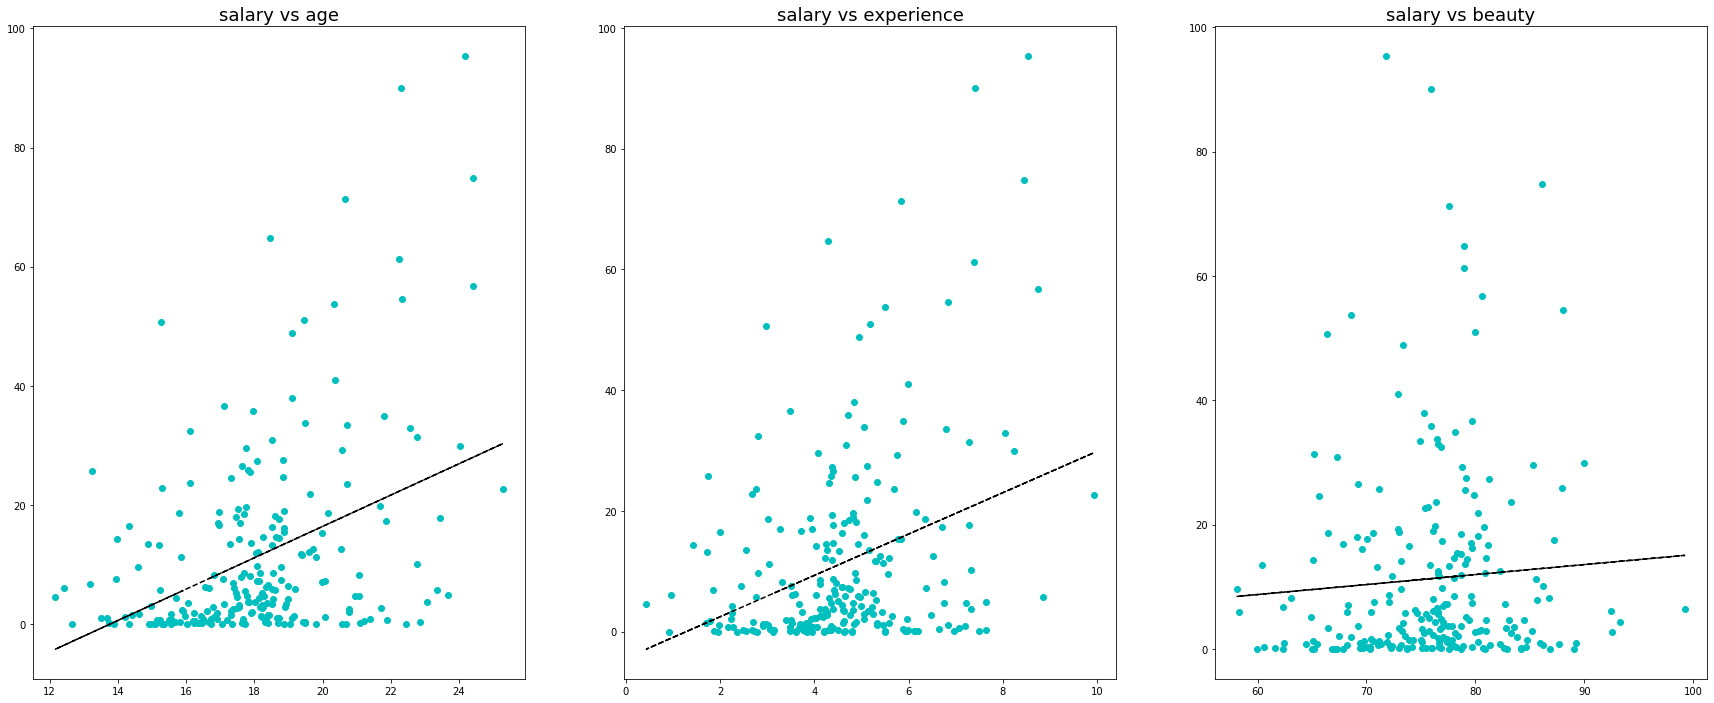

In [343]:
fig = plt.figure(figsize=(30,12))


ax1=plt.subplot(131)
coef  =np.polyfit(data['age'], data['salary'],1)
poly1d_fn = np.poly1d(coef) 
_=plt.plot(data['age'],data['salary'],'co' , data['age'], poly1d_fn(data['age']), '--k')
_=ax1.set_title('salary vs age', fontdict={'fontsize': 18, 'fontweight': 'medium'})


ax2=plt.subplot(132)
coef  =np.polyfit(data['years'], data['salary'],1)
poly1d_fn = np.poly1d(coef) 
_=plt.plot(data['years'],data['salary'],'co' , data['years'], poly1d_fn(data['years']), '--k')
_=ax2.set_title('salary vs experience', fontdict={'fontsize': 18, 'fontweight': 'medium'})



ax3 = plt.subplot(133)
coef  =np.polyfit(data['beauty'], data['salary'],1)
poly1d_fn = np.poly1d(coef) 
_=plt.plot(data['beauty'],data['salary'],'co' , data['beauty'], poly1d_fn(data['beauty']), '--k')
_=ax3.set_title('salary vs beauty', fontdict={'fontsize': 18, 'fontweight': 'medium'})


### Fitting Models

In [344]:
m01 = sm.ols('salary~age', data=data)
res_1 = m01.fit()
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     42.96
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           3.65e-10
Time:                        15:37:44   Log-Likelihood:                -948.26
No. Observations:                 231   AIC:                             1901.
Df Residuals:                     229   BIC:                             1907.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.1820      7.315     -4.947      0.000     -50.594     -21.770
age            2.6301      0.401      6.555      0.000       1.839       3.421
==============================================================================
Omnibus:                      101.715   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              354.017
Skew:                           1.876   Prob(JB):                     1.34e-77
Kurtosis:                       7.765   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [345]:
m02 = sm.ols('salary~age+years', data=data)
res_2 = m02.fit()
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     24.70
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           1.96e-10
Time:                        15:37:44   Log-Likelihood:                -945.47
No. Observations:                 231   AIC:                             1897.
Df Residuals:                     228   BIC:                             1907.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -68.4091     15.453     -4.427      0.000     -98.858     -37.960
age            5.6420      1.336      4.222      0.000       3.009       8.275
years         -4.8396      2.050     -2.361      0.019      -8.879      -0.800
==============================================================================
Omnibus:                      103.585   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              380.278
Skew:                           1.888   Prob(JB):                     2.65e-83
Kurtosis:                       8.026   Cond. No.                         307.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [346]:
m03 = sm.ols('salary~age+years+beauty', data=data)
res_3 = m03.fit()
res_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     17.07
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           4.97e-10
Time:                        15:37:44   Log-Likelihood:                -944.63
No. Observations:                 231   AIC:                             1897.
Df Residuals:                     227   BIC:                             1911.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -60.8897     16.497     -3.691      0.000     -93.396     -28.384
age            6.2344      1.411      4.418      0.000       3.454       9.015
years         -5.5612      2.122     -2.621      0.009      -9.743      -1.380
beauty        -0.1964      0.152     -1.289      0.199      -0.497       0.104
==============================================================================
Omnibus:                      101.011   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              359.948
Skew:                           1.847   Prob(JB):                     6.89e-79
Kurtosis:                       7.873   Cond. No.                     1.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Comparing Models

In [347]:
from statsmodels.stats.anova import anova_lm

In [348]:
anova_res = anova_lm(res_1, res_2, res_3)
print(anova_res)

   df_resid           ssr  df_diff      ss_diff         F    Pr(>F)
0     229.0  49742.554716      0.0          NaN       NaN       NaN
1     228.0  48555.607734      1.0  1186.946982  5.589655  0.018906
2     227.0  48202.790126      1.0   352.817608  1.661514  0.198711


/home/atrides/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/atrides/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/atrides/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


#### It seems that including beauty as a predictor in our model doesn't improves the model much as we can see from aic, bic , r_squared and adjusted r_squared.

### Checking For Outlier Influence

In [349]:
from statsmodels.stats.outliers_influence import OLSInfluence

In [350]:
summary_frame = OLSInfluence(res_2).summary_frame()
summary_frame.head()

,dfb_Intercept,dfb_age,dfb_years,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.033540,-0.044738,0.055102,0.001945,-0.690702,0.012086,-0.076395,-0.689908,-0.076308
1,-0.205945,0.202840,-0.166390,0.024228,2.344288,0.013053,0.269599,2.367853,0.272309
2,-0.041159,0.042699,-0.045280,0.001031,-0.485146,0.012970,-0.055612,-0.484331,-0.055519
3,0.004125,-0.003939,0.003515,0.000006,0.026252,0.027298,0.004398,0.026194,0.004388
4,-0.280103,0.151295,0.106269,0.255173,4.783080,0.032378,0.874940,5.031695,0.920418


In [351]:
summary_frame = summary_frame[['cooks_d','standard_resid', 'student_resid', 'hat_diag' ]]
summary_frame.head()

,cooks_d,standard_resid,student_resid,hat_diag
0,0.001945,-0.690702,-0.689908,0.012086
1,0.024228,2.344288,2.367853,0.013053
2,0.001031,-0.485146,-0.484331,0.012970
3,0.000006,0.026252,0.026194,0.027298
4,0.255173,4.783080,5.031695,0.032378


In [352]:
resid = pd.DataFrame(data['salary'] - res_2.fittedvalues)
resid.columns = ['residual']
resid.head()

,residual
0,-10.018503
1,33.986792
2,-7.033803
3,0.377834
4,68.661427


In [353]:
dfbeta = pd.DataFrame(pd.DataFrame(OLSInfluence(res_2).dfbeta)[0])
dfbeta.columns = ['dfbeta']
dfbeta.head()

,dfbeta
0,0.518891
1,-3.150814
2,-0.637103
3,0.063881
4,-4.114599


In [354]:
df_ = [data, resid, summary_frame, dfbeta]

In [355]:
from functools import reduce
final_summary = reduce(lambda left,right: pd.merge(left,right, left_index=True, right_index=True), df_)

In [356]:
final_summary.head()

,salary,age,years,beauty,residual,cooks_d,standard_resid,student_resid,hat_diag,dfbeta
0,0.370397,16.666995,3.148455,78.251493,-10.018503,0.001945,-0.690702,-0.689908,0.012086,0.518891
1,53.724789,20.347072,5.506886,68.569986,33.986792,0.024228,2.344288,2.367853,0.013053,-3.150814
2,1.460159,18.203071,5.330748,75.043759,-7.033803,0.001031,-0.485146,-0.484331,0.012970,-0.637103
3,0.024334,15.356265,3.840088,65.142527,0.377834,0.000006,0.026252,0.026194,0.027298,0.063881
4,95.338070,24.171832,8.532050,71.770386,68.661427,0.255173,4.783080,5.031695,0.032378,-4.114599


In [357]:
large_resid  = final_summary[(final_summary['standard_resid']>=2) | (final_summary['standard_resid']<=-2)]
large_resid

,salary,age,years,beauty,residual,cooks_d,standard_resid,student_resid,hat_diag,dfbeta
1,53.724789,20.347072,5.506886,68.569986,33.986792,0.024228,2.344288,2.367853,0.013053,-3.150814
4,95.338070,24.171832,8.532050,71.770386,68.661427,0.255173,4.783080,5.031695,0.032378,-4.114599
23,48.867662,19.114506,4.951027,73.326263,33.393665,0.011946,2.296059,2.317973,0.006752,-1.588065
40,51.025164,19.462001,5.187275,80.001412,34.733949,0.013723,2.388707,2.413859,0.007163,-1.723422
90,56.831515,24.411458,8.753041,80.651031,29.872408,0.052673,2.083911,2.099425,0.035110,-1.602219
115,64.791295,18.468392,4.284322,78.917626,49.736076,0.041217,3.426059,3.510084,0.010425,-3.686601
126,61.318796,22.252754,7.397138,78.929168,39.977047,0.047118,2.764634,2.805998,0.018158,-0.996626
134,89.980027,22.288989,7.419825,75.930177,68.543640,0.140313,4.740721,4.982237,0.018385,-1.741814
154,74.860754,24.406821,8.444767,86.092120,46.435876,0.123972,3.237955,3.307795,0.034258,-4.414935
169,54.565519,22.314221,6.833367,88.014704,30.148531,0.030814,2.087715,2.103333,0.020769,-3.214501


In [358]:
cov_ratio = pd.DataFrame(OLSInfluence(res_2).cov_ratio)
cov_ratio.columns = ['cov_ratio']
cov_ratio.head()

,cov_ratio
0,1.019245
1,0.954210
2,1.023413
3,1.041702
4,0.762525


In [359]:
k = 2 #number of predictors
n = len(data)#number of objervations

average_leverage = (k+1)/n
average_leverage

0.012987012987012988

In [360]:
cvr_limit_high = 1+3*average_leverage
cvr_limit_low  = 1-3*average_leverage

(cvr_limit_low, cvr_limit_high)

(0.961038961038961, 1.0389610389610389)

In [361]:
large_resid = pd.merge(large_resid, cov_ratio, how = 'left', right_index=True, left_index=True)
large_resid

,salary,age,years,beauty,residual,cooks_d,standard_resid,student_resid,hat_diag,dfbeta,cov_ratio
1,53.724789,20.347072,5.506886,68.569986,33.986792,0.024228,2.344288,2.367853,0.013053,-3.150814,0.954210
4,95.338070,24.171832,8.532050,71.770386,68.661427,0.255173,4.783080,5.031695,0.032378,-4.114599,0.762525
23,48.867662,19.114506,4.951027,73.326263,33.393665,0.011946,2.296059,2.317973,0.006752,-1.588065,0.951021
40,51.025164,19.462001,5.187275,80.001412,34.733949,0.013723,2.388707,2.413859,0.007163,-1.723422,0.945863
90,56.831515,24.411458,8.753041,80.651031,29.872408,0.052673,2.083911,2.099425,0.035110,-1.602219,0.991275
115,64.791295,18.468392,4.284322,78.917626,49.736076,0.041217,3.426059,3.510084,0.010425,-3.686601,0.873806
126,61.318796,22.252754,7.397138,78.929168,39.977047,0.047118,2.764634,2.805998,0.018158,-0.996626,0.931666
134,89.980027,22.288989,7.419825,75.930177,68.543640,0.140313,4.740721,4.982237,0.018385,-1.741814,0.756099
154,74.860754,24.406821,8.444767,86.092120,46.435876,0.123972,3.237955,3.307795,0.034258,-4.414935,0.911030
169,54.565519,22.314221,6.833367,88.014704,30.148531,0.030814,2.087715,2.103333,0.020769,-3.214501,0.976549


### doctored data  , i.e removing large_resid points from data to see how the output changes

In [362]:
df_new = data.merge(large_resid, how='left', indicator=True)
df_new = df_new[df_new['_merge'] == 'left_only']
df_new.head()

,salary,age,years,beauty,residual,cooks_d,standard_resid,student_resid,hat_diag,dfbeta,cov_ratio,_merge
0,0.370397,16.666995,3.148455,78.251493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,1.460159,18.203071,5.330748,75.043759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,0.024334,15.356265,3.840088,65.142527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5,14.635478,18.260225,4.393158,78.052239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
6,8.673332,17.698608,4.396633,72.068169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [363]:
df_new.reset_index(inplace=True,drop=True)

In [364]:
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     24.70
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           1.96e-10
Time:                        15:37:47   Log-Likelihood:                -945.47
No. Observations:                 231   AIC:                             1897.
Df Residuals:                     228   BIC:                             1907.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -68.4091     15.453     -4.427      0.000     -98.858     -37.960
age            5.6420      1.336      4.222      0.000       3.009       8.275
years         -4.8396      2.050     -2.361      0.019      -8.879      -0.800
==============================================================================
Omnibus:                      103.585   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              380.278
Skew:                           1.888   Prob(JB):                     2.65e-83
Kurtosis:                       8.026   Cond. No.                         307.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [365]:
m04 = sm.ols('salary~age+years', data=df_new)
res_4 = m04.fit()
res_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     11.78
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           1.40e-05
Time:                        15:37:47   Log-Likelihood:                -797.66
No. Observations:                 219   AIC:                             1601.
Df Residuals:                     216   BIC:                             1611.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.6221     10.125     -3.518      0.001     -55.579     -15.665
age            3.3798      0.869      3.888      0.000       1.666       5.093
years         -3.6653      1.322     -2.772      0.006      -6.271      -1.059
==============================================================================
Omnibus:                       41.111   Durbin-Watson:                   2.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.805
Skew:                           1.192   Prob(JB):                     2.80e-13
Kurtosis:                       3.805   Cond. No.                         304.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

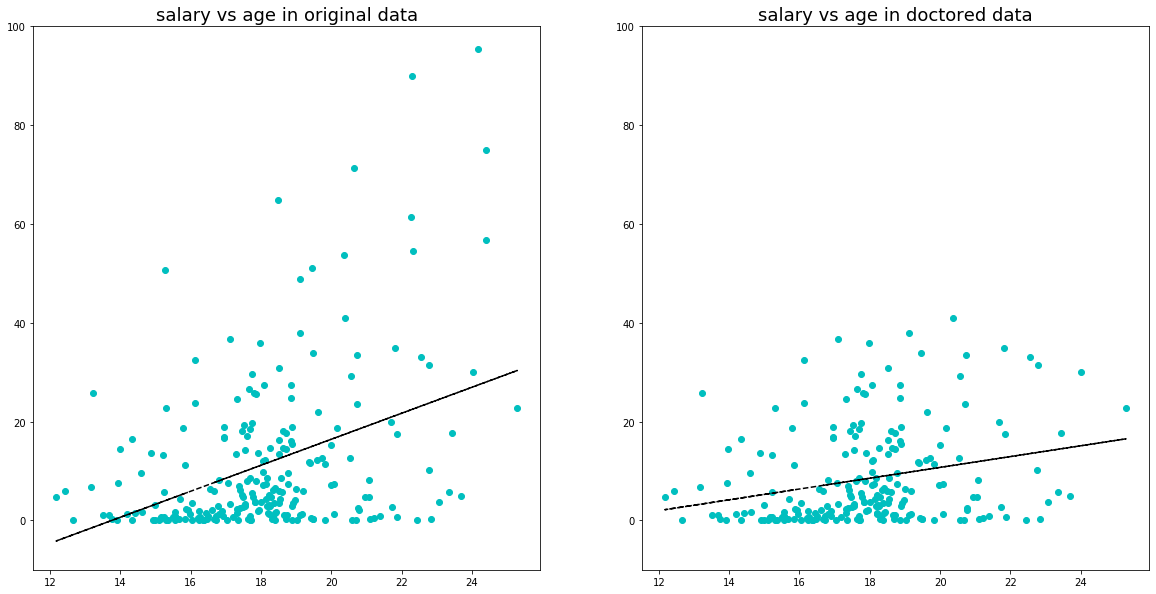

In [366]:
fig = plt.figure(figsize=(20,10))


a1=plt.subplot(122)
coef  =np.polyfit(df_new['age'], df_new['salary'],1)
poly1d_fn = np.poly1d(coef) 
_=plt.plot(df_new['age'],df_new['salary'],'co' , df_new['age'], poly1d_fn(df_new['age']), '--k')
_=a1.set_ylim([-10,100])
_=a1.set_title('salary vs age in doctored data', fontdict={'fontsize': 18, 'fontweight': 'medium'})


a2=plt.subplot(121)
coef  =np.polyfit(data['age'], data['salary'],1)
poly1d_fn = np.poly1d(coef) 
_=plt.plot(data['age'],data['salary'],'co' , data['age'], poly1d_fn(data['age']), '--k')
_=a2.set_ylim([-10,100])
_=a2.set_title('salary vs age in original data', fontdict={'fontsize': 18, 'fontweight': 'medium'})

### In this case it seems that the line outliers affect our model to some extent!

### Testing Assumptions

In [367]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(res_2.resid)

2.060416401522657

In [368]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [369]:
df_ = add_constant(data)
df_.drop(['salary'],axis=1, inplace=True)
df_.head()

,const,age,years,beauty
0,1.0,16.666995,3.148455,78.251493
1,1.0,20.347072,5.506886,68.569986
2,1.0,18.203071,5.330748,75.043759
3,1.0,15.356265,3.840088,65.142527
4,1.0,24.171832,8.532050,71.770386


In [370]:
vif = pd.Series([variance_inflation_factor(df_.values, i) 
               for i in range(1, df_.shape[1])], 
              index=df_.columns[1:])

In [371]:
vif

age       12.652841
years     12.156757
beauty     1.153364
dtype: float64

In [372]:
avg_vif  = np.mean(vif)
avg_vif

8.654320446458401

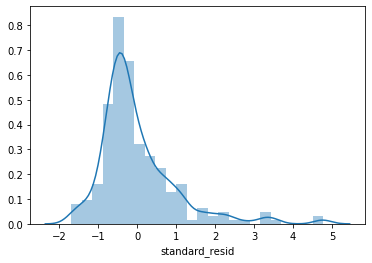

In [373]:
_=sns.distplot(final_summary['standard_resid'])

In [374]:
# performing shapiro-wilk test for checking the normality of errors
st.shapiro(final_summary['standard_resid'])

(0.8420507907867432, 1.3236583866742951e-14)

#### error deviates from normality

In [375]:
prediction = pd.DataFrame(res_2.fittedvalues)
prediction.columns = ['predicted']
prediction.head()

,predicted
0,10.388900
1,19.737997
2,8.493962
3,-0.353500
4,26.676643


In [376]:
prediction['standarized_prediction']  = (prediction['predicted']-prediction['predicted'].mean())/prediction['predicted'].std()
prediction.head()

,predicted,standarized_prediction
0,10.388900,-0.140408
1,19.737997,1.242022
2,8.493962,-0.420609
3,-0.353500,-1.728864
4,26.676643,2.268025


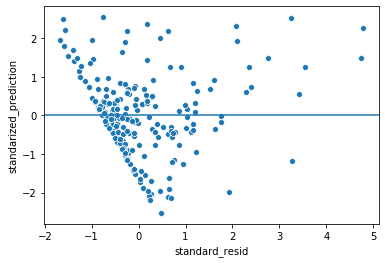

In [377]:
_ = sns.scatterplot(x= final_summary['standard_resid'], y = prediction['standarized_prediction'] )
_ = plt.axhline(y=0)

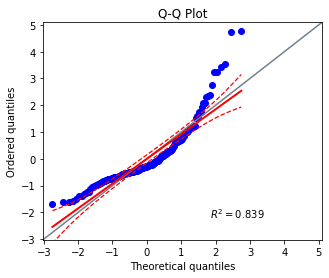

In [378]:
_=pg.qqplot(final_summary['standard_resid'])

#### Residuals: There are six cases that have a standardized residual greater than 3, and two of these  are  fairly  substantial  (case  5  and  135).  We  have  5.19%  of  cases  with  standardized residuals  above  2,  so  that’s  as  we  expect,  but  3%  of  cases  with  residuals  above  2.5  (we’d expect only 1%), which indicates possible outliers.

#### Normality of errors: The histogram reveals a skewed distribution, indicating that the normality of errors assumption has been broken. The normal Q–Q plot verifies this because there is a large amount of deviation from the straight line.

#### Homoscedasticity  and  independence  of  errors:  The  scatterplot  of the  standardized  residualsdoes not show a random pattern. There is a distinct funnelling, indicating heteroscedasticity. However, the Durbin–Watson statistic does fall within Field’s recommended boundaries of 1–3, which suggests that errors are reasonably independent

#### Multicollinearity: For the age and experience variables in the model, VIF values are above 10 (or  alternatively,  tolerance  values  are  all well  below  0.1), indicating multicollinearity in the data. It is possible that these two variables are highly correlated and therefore are measuring very  similar  things.  Of  course,  this  makes  perfect  sense  because  the  older  a  model  is,  the more  years  she would’ve  spent  modelling!  So,  it  was  fairly  stupid  to  measure  both  of  these things! This also explains the weird result that the number of years spent modelling negatively predicted salary (i.e. more experience = less salary!): in fact if you do a simple regression with experience as the only predictor of salary you’ll find it has the expected positive relationship. This hopefully demonstrates why multicollinearity can bias the regression model.

## All  in  all,  several  assumptions  have  not  been  met  and  so  this model  is  probably  fairly unreliable